In [2]:
from autograd import Value
import matplotlib.pyplot as plt

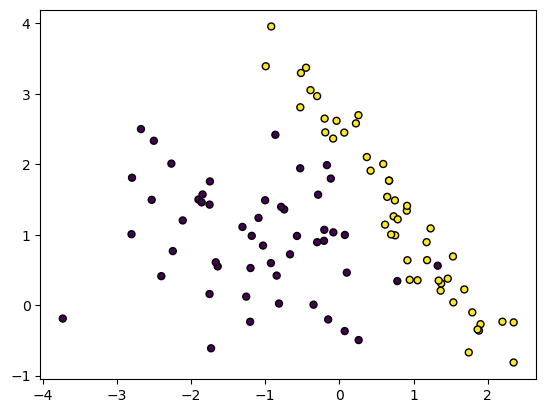

In [17]:
from sklearn.datasets import make_classification
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state = 15
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
